In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('first inten project.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [5]:
data.shape

(36285, 17)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

**Breaking down information**<br>
Booking_ID: unique identifier of each booking <br>
no_of_adults: Number of adults<br>
no_of_children: Number of Children<br>
no_of_weekend_nights: Number of weekend nights the guest stayed or booked to stay at the hotel<br>
no_of_week_nights: Number of week nights the guest stayed or booked to stay at the hotel<br>
type_of_meal_plan: Type of meal plan booked by the customer:<br>
required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)<br>
room_type_reserved: Type of room reserved by the customer. <br>
lead_time: Number of days between the date of booking and the arrival date<br>
arrival_year: Year of arrival date<br>
arrival_month: Month of arrival date<br>
arrival_date: Date of the month<br>
market_segment_type: Market segment designation.<br>
repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)<br>
no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking<br>
no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking<br>
avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic.<br>
no_of_special_requests: Total number of special requests made by the customer<br>
booking_status: Flag indicating if the booking was canceled or not.

In [8]:
data.drop('Booking_ID',axis=1, inplace=True)

In [9]:
data.isna().sum()

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [10]:
data.duplicated().sum()

10276

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
print(data['type of meal'].unique())
print(data['room type'].unique())
print(data['market segment type'].unique())
print(data['booking status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Not_Canceled' 'Canceled']


In [13]:
data.columns = [col.replace(" ", "_") for col in data.columns]

In [14]:
data.columns

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'type_of_meal', 'car_parking_space',
       'room_type', 'lead_time', 'market_segment_type', 'repeated', 'P-C',
       'P-not-C', 'average_price_', 'special_requests', 'date_of_reservation',
       'booking_status'],
      dtype='object')

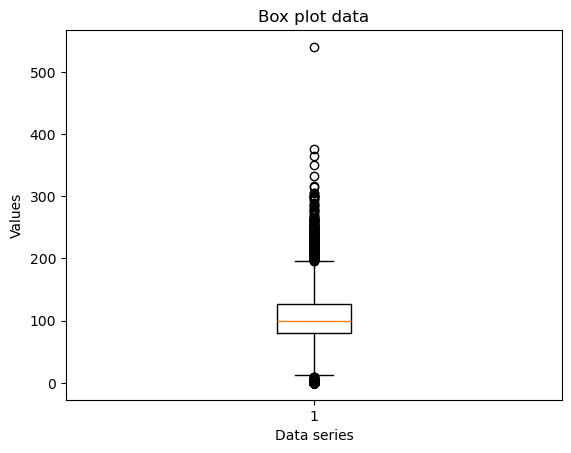

In [15]:
plt.boxplot(data["average_price_"])

plt.title('Box plot data')
plt.xlabel('Data series')
plt.ylabel('Values')

plt.show()

In [16]:
def removeoutlier(col):
    sorted(col)
    qu1, qu2=col.quantile([0.25,0.75])
    IQR=qu2-qu1
    lr=qu1-(1.5*IQR)
    ur=qu2+(1.5*IQR)
    return lr,ur
lowscore,highscore=removeoutlier(data["average_price_"])
data["average_price_"]=np.where(data["average_price_"]>highscore,highscore,data["average_price_"])
data["average_price_"]=np.where(data["average_price_"]<lowscore,lowscore,data["average_price_"])

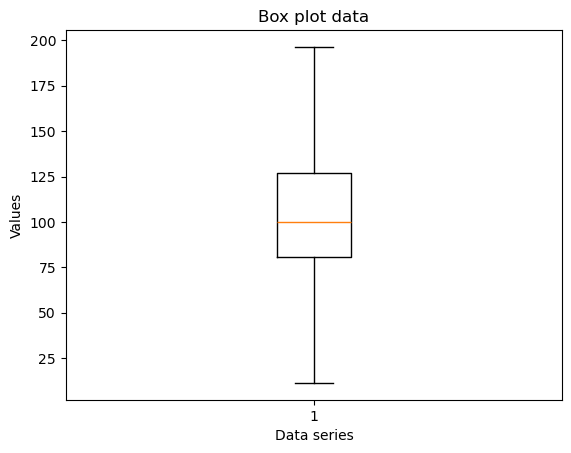

In [17]:
plt.boxplot(data["average_price_"])

plt.title('Box plot data')
plt.xlabel('Data series')
plt.ylabel('Values')

plt.show()

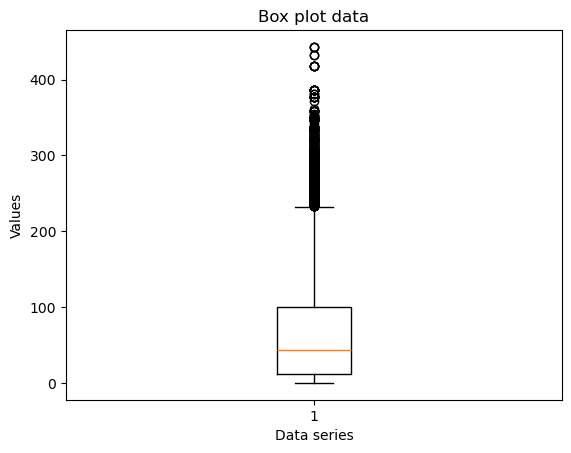

In [18]:
plt.boxplot(data["lead_time"])

plt.title('Box plot data')
plt.xlabel('Data series')
plt.ylabel('Values')

plt.show()

In [19]:
def removeoutlier(col):
    sorted(col)
    qu1, qu2=col.quantile([0.25,0.75])
    IQR=qu2-qu1
    lr=qu1-(1.5*IQR)
    ur=qu2+(1.5*IQR)
    return lr,ur
lowscore,highscore=removeoutlier(data["lead_time"])
data["lead_time"]=np.where(data["lead_time"]>highscore,highscore,data["lead_time"])
data["lead_time"]=np.where(data["lead_time"]<lowscore,lowscore,data["lead_time"])

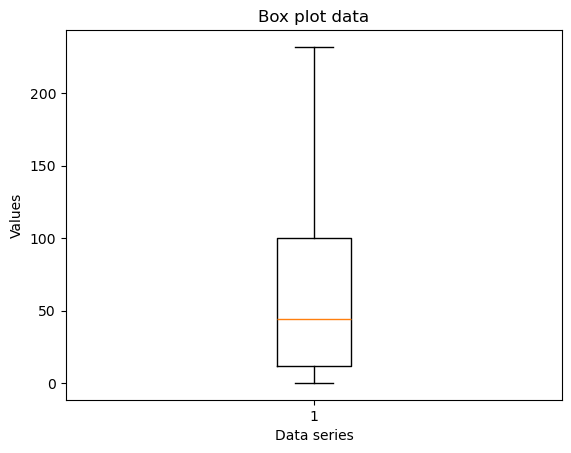

In [20]:
plt.boxplot(data["lead_time"])

plt.title('Box plot data')
plt.xlabel('Data series')
plt.ylabel('Values')

plt.show()

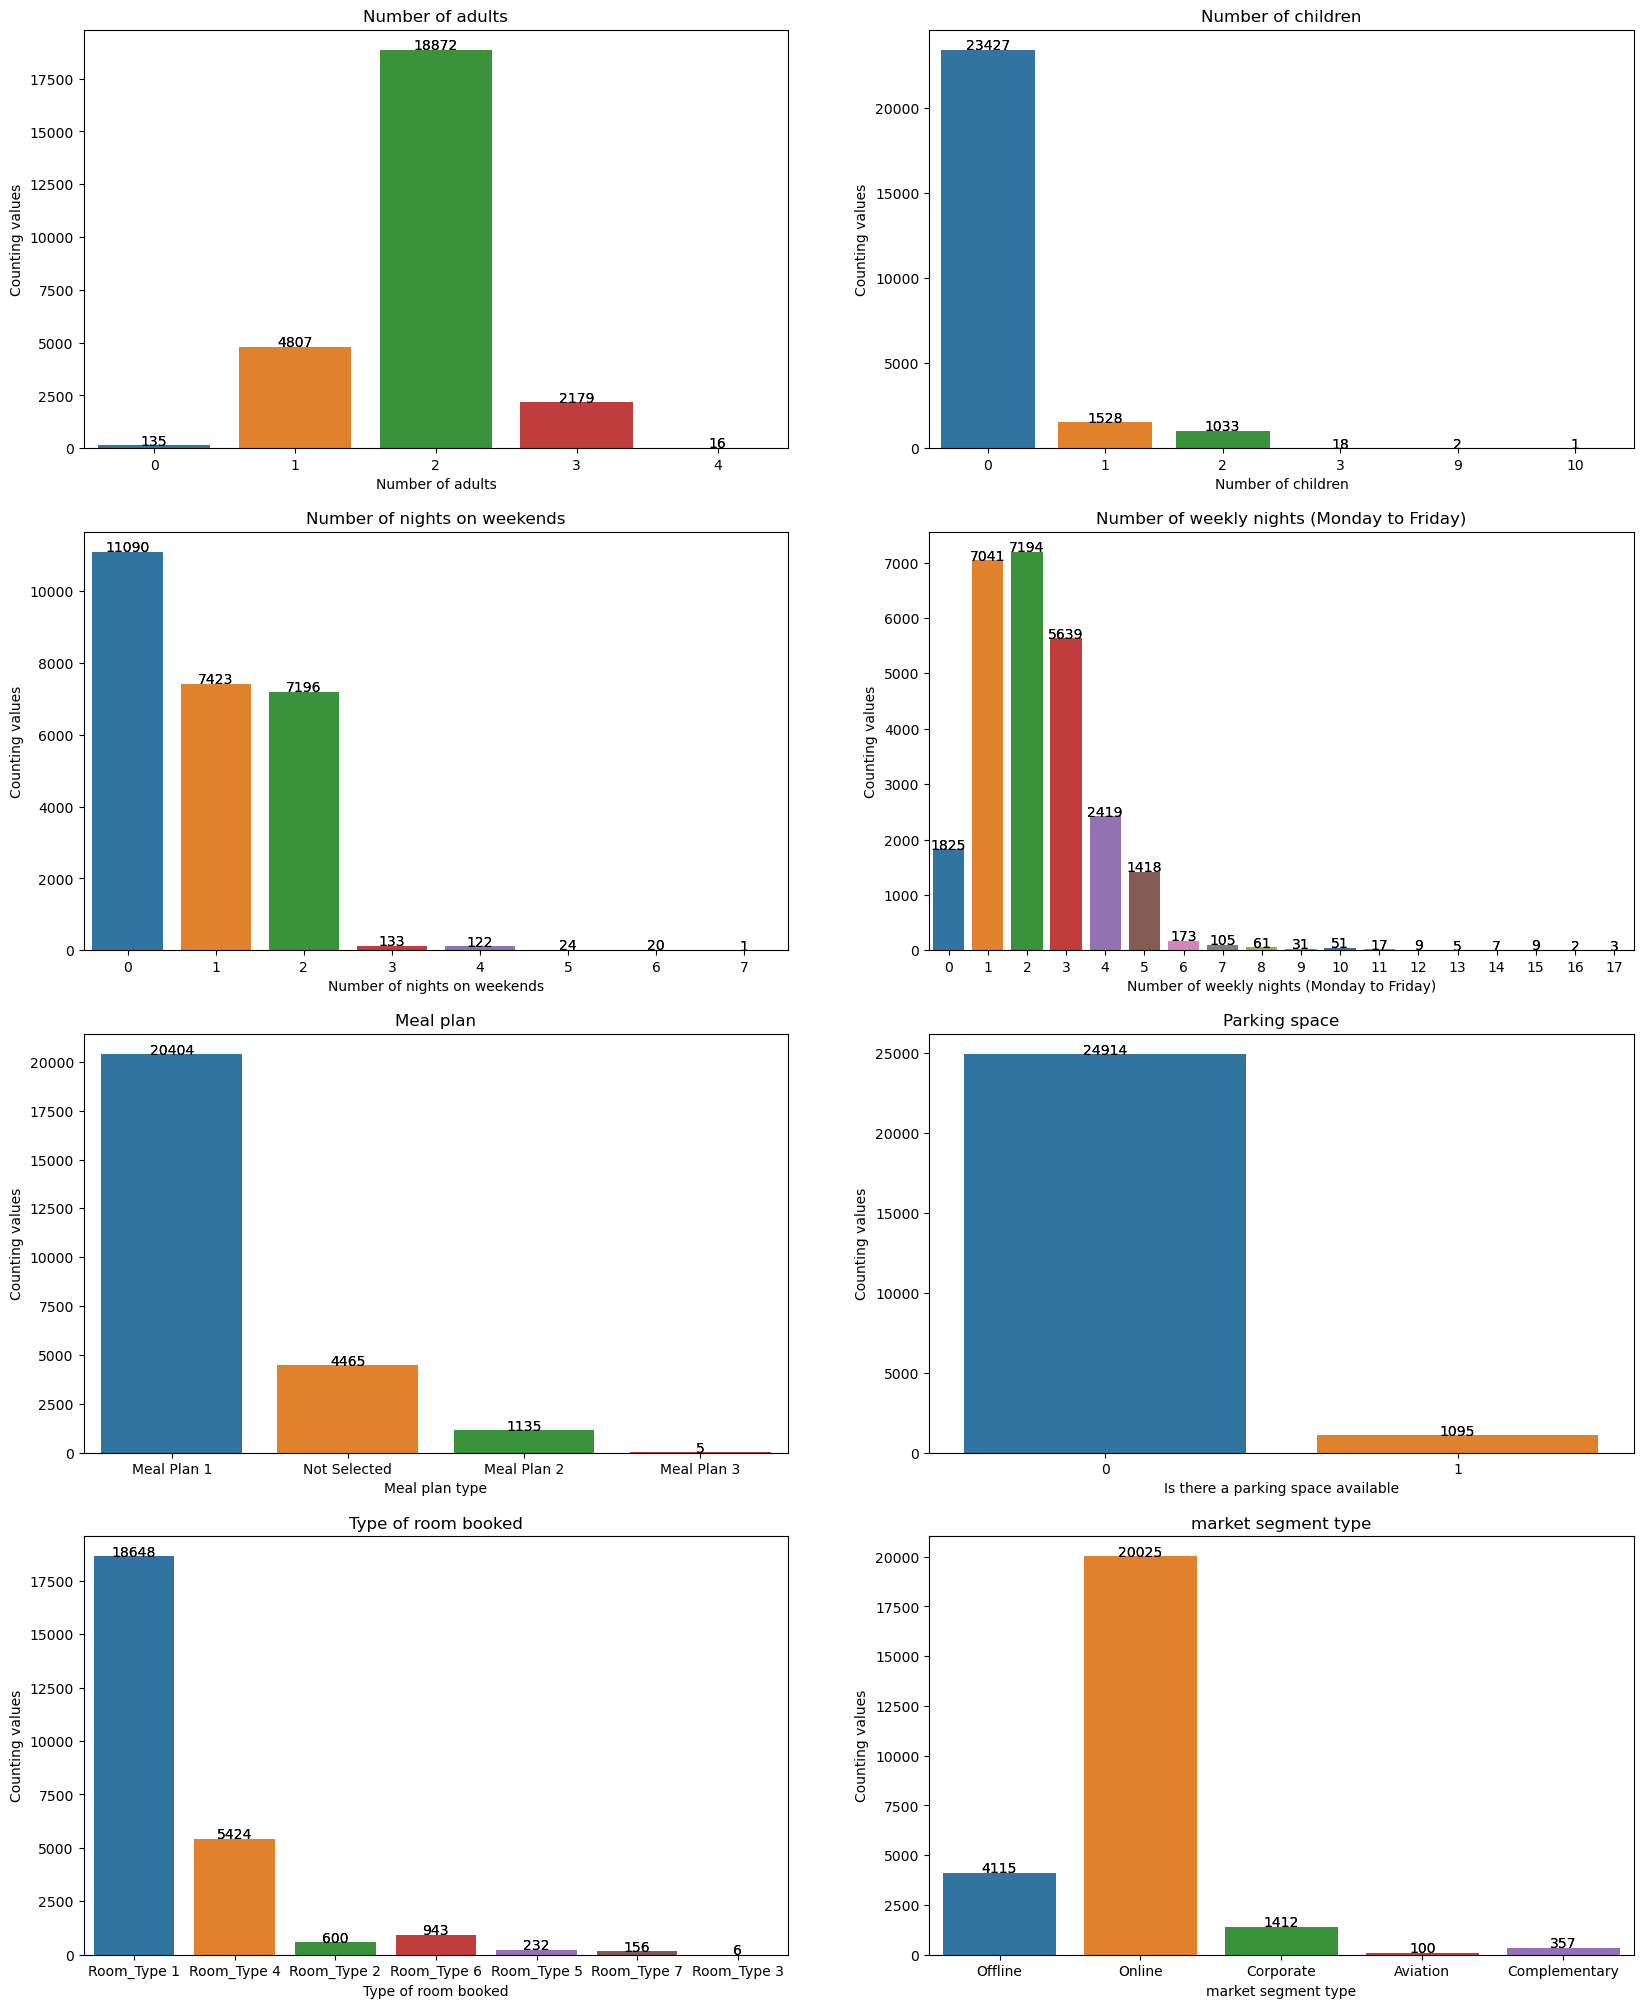

In [21]:
def add_count_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 0.1, str(int(height)), ha="center")
        
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Number of adults')
sb.countplot(x = 'number_of_adults', palette = 'tab10', data = data)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'number_of_adults', palette = 'tab10', data = data))

plt.subplot(4,2,2)
plt.gca().set_title('Number of children')
sb.countplot(x = 'number_of_children', palette = 'tab10', data = data)
plt.xlabel('Number of children')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'number_of_children', palette = 'tab10', data = data))

plt.subplot(4,2,3)
plt.gca().set_title('Number of nights on weekends')
sb.countplot(x = 'number_of_weekend_nights', palette = 'tab10', data = data)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'number_of_weekend_nights', palette = 'tab10', data = data))

plt.subplot(4,2,4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sb.countplot(x = 'number_of_week_nights', palette = 'tab10', data = data)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'number_of_week_nights', palette = 'tab10', data = data))

plt.subplot(4,2,5)
plt.gca().set_title('Meal plan')
sb.countplot(x = 'type_of_meal', palette = 'tab10', data = data)
plt.xlabel('Meal plan type')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'type_of_meal', palette = 'tab10', data = data))

plt.subplot(4,2,6)
plt.gca().set_title('Parking space')
sb.countplot(x = 'car_parking_space', palette = 'tab10', data = data)
plt.xlabel('Is there a parking space available')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'car_parking_space', palette = 'tab10', data = data))

plt.subplot(4,2,7)
plt.gca().set_title('Type of room booked')
sb.countplot(x = 'room_type', palette = 'tab10', data = data)
plt.xlabel('Type of room booked')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'room_type', palette = 'tab10', data = data))

plt.subplot(4,2,8)
plt.gca().set_title('market segment type')
sb.countplot(x = 'market_segment_type', palette = 'tab10', data = data)
plt.xlabel('market segment type')
plt.ylabel('Counting values')
add_count_labels(sb.countplot(x = 'market_segment_type', palette = 'tab10', data = data))


In [22]:
data["repeated"].value_counts()

repeated
0    25157
1      852
Name: count, dtype: int64

In [23]:
from datetime import datetime
formats = ["%m/%d/%Y", "%Y/%m/%d","%m-%d-%Y", "%Y-%m-%d"]
def extract_month(date_str):
    for fmt in formats:
        try:
            date_object = datetime.strptime(date_str, fmt)
            return date_object.month
        except ValueError:
            pass
    return None  

data['date_of_reservation'] = data['date_of_reservation'].apply(extract_month)

In [68]:
import calendar
data['date_of_reservation'] = data['date_of_reservation'].astype(int)

def get_month_name(month_number):
  return calendar.month_name[month_number]

data['date_of_reservation'] = data['date_of_reservation'].apply(get_month_name)

print(data)

       number_of_adults  number_of_children  number_of_weekend_nights  \
0                     1                   1                         2   
1                     1                   0                         1   
2                     2                   1                         1   
3                     1                   0                         0   
4                     1                   0                         1   
...                 ...                 ...                       ...   
36273                 2                   0                         0   
36276                 2                   0                         2   
36279                 2                   0                         1   
36281                 2                   0                         1   
36283                 3                   0                         0   

       number_of_week_nights  type_of_meal  car_parking_space    room_type  \
0                          5   Meal Plan 1   

In [70]:
counts=data['date_of_reservation'].value_counts()

In [72]:
counts

date_of_reservation
October      3211
August       3059
September    3058
December     2386
July         2287
November     2193
April        2036
March        1992
June         1850
May          1846
February     1282
January       774
Name: count, dtype: int64

Text(0, 0.5, 'Number of Reservations')

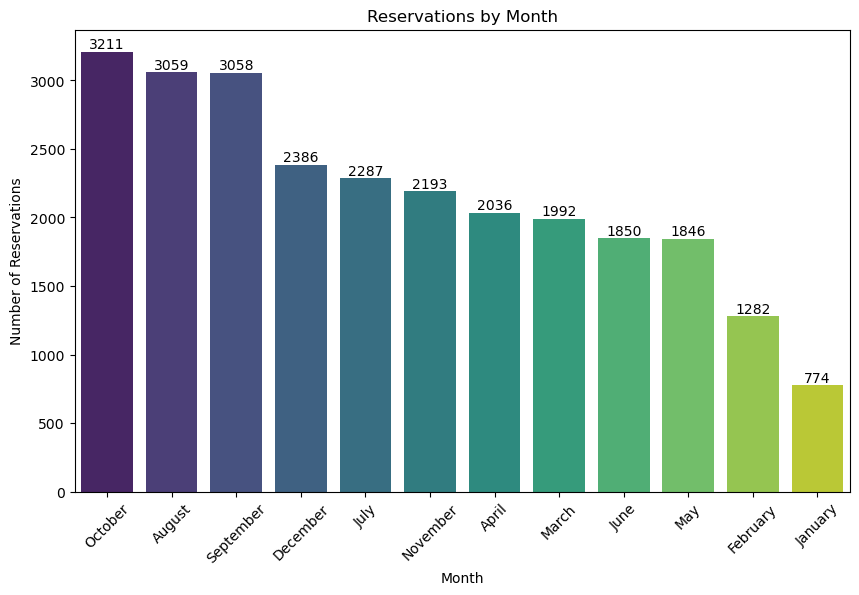

In [86]:
plt.figure(figsize=(10, 6)) 
ax = sb.barplot(x=counts.index, y=counts.values, palette="viridis") 
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title("Reservations by Month")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Reservations")

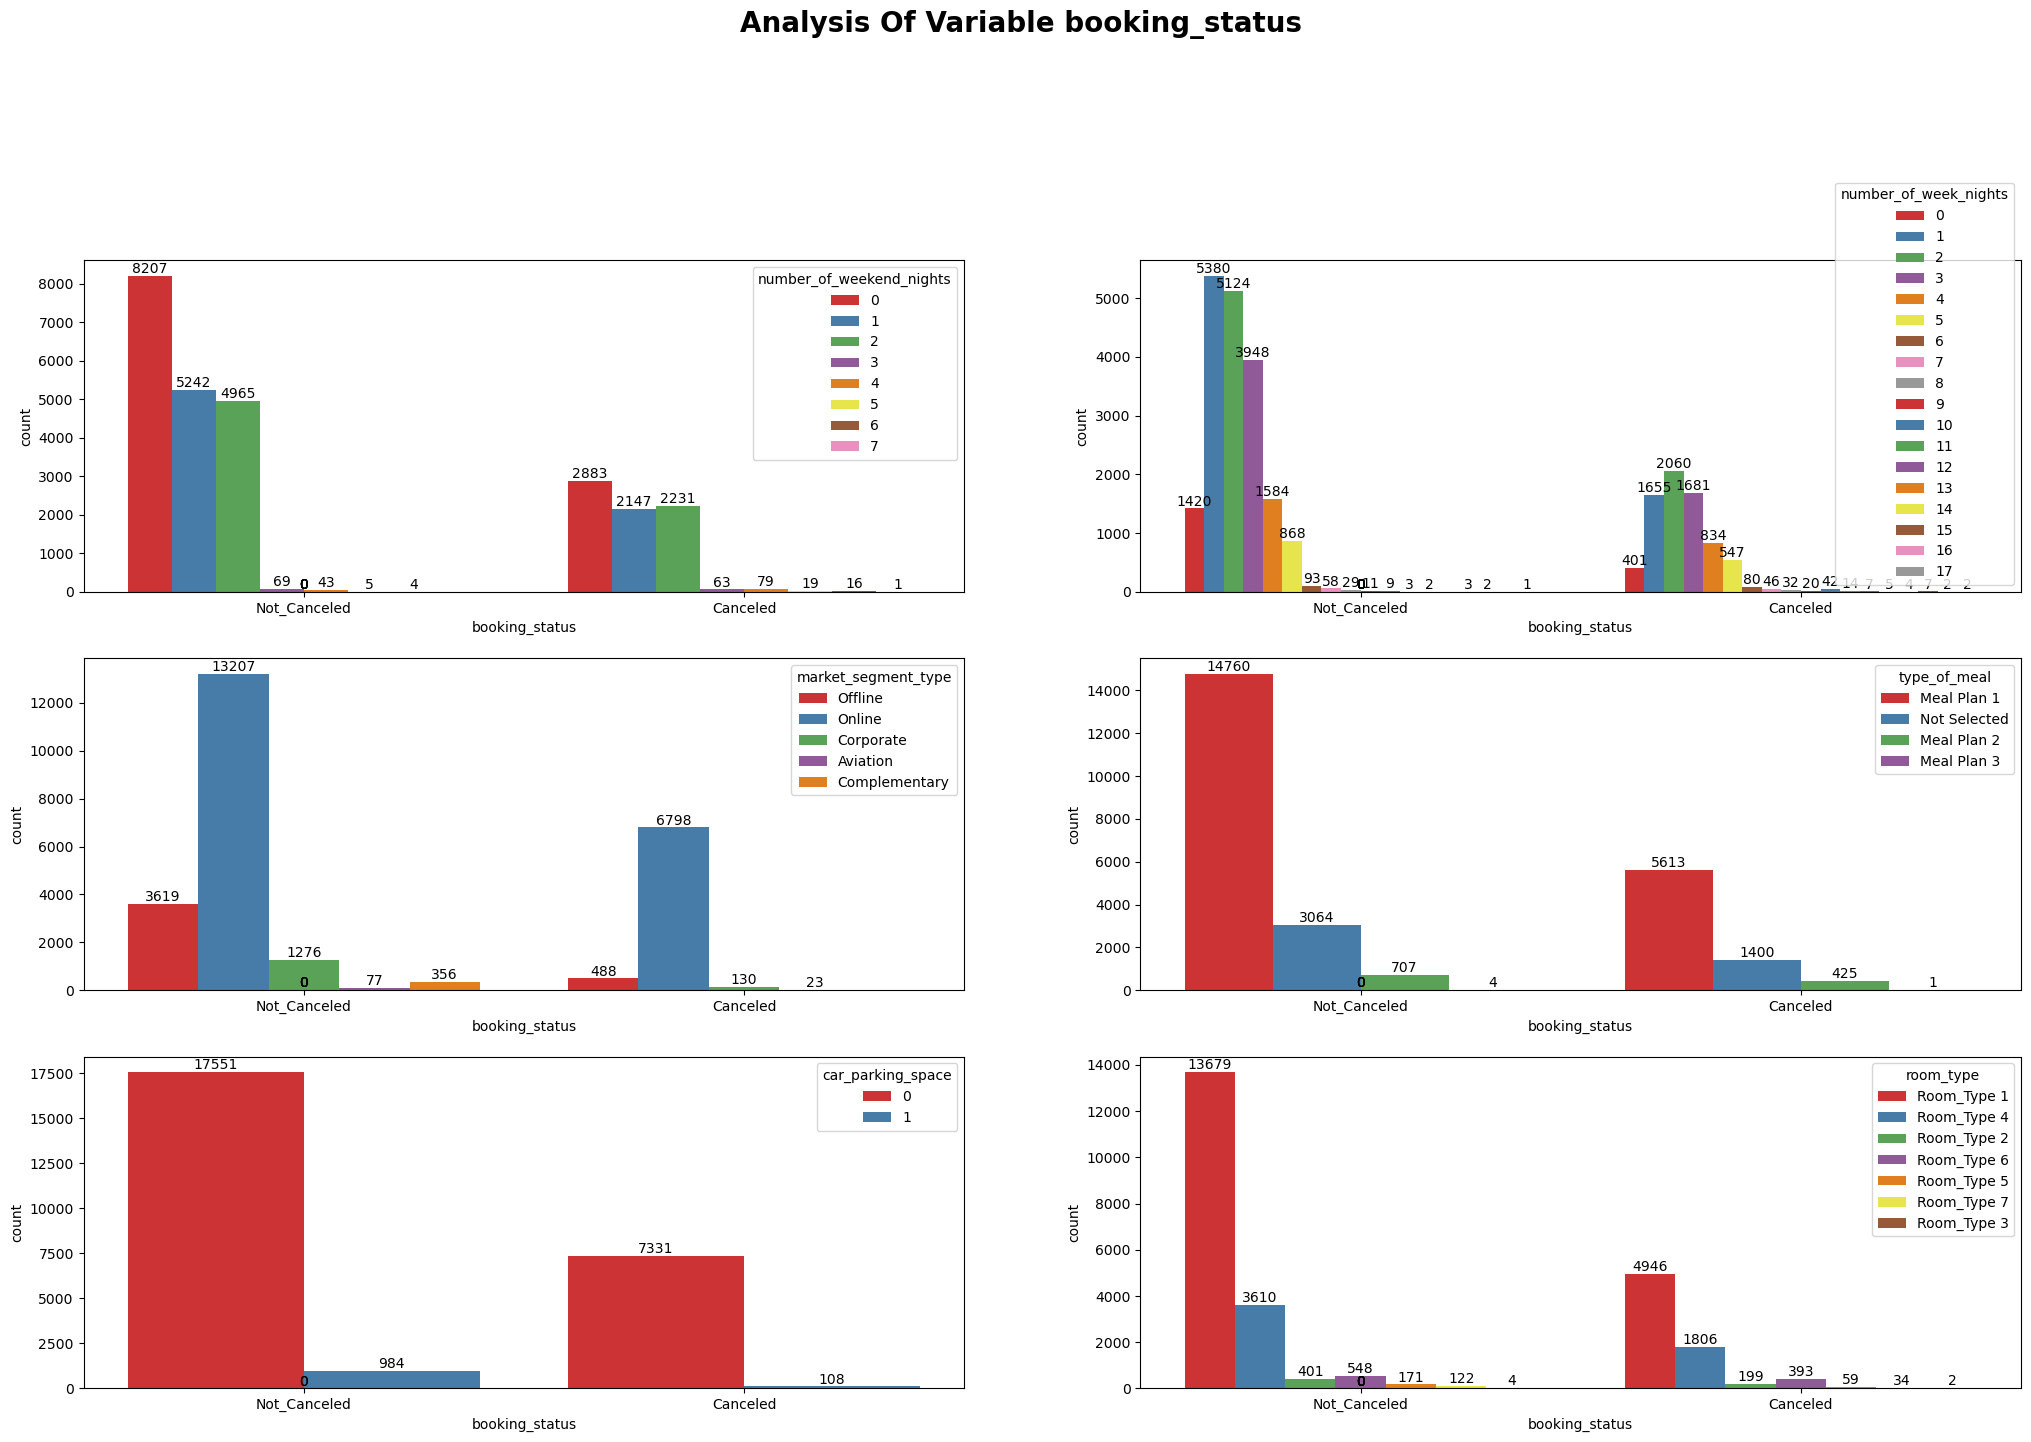

In [96]:
plt.figure(figsize = (25, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

def add_counts(ax, hue_var):  
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
        
plt.subplot(5,2,1)
ax1=sb.countplot(x = 'booking_status', hue = 'number_of_weekend_nights', palette = 'Set1', data = data)
add_counts(ax1, 'number_of_weekend_nights')

plt.subplot(5,2,2)
ax2=sb.countplot(x = 'booking_status', hue = 'number_of_week_nights', palette = 'Set1', data = data)
add_counts(ax2, 'number_of_week_nights')

plt.subplot(5,2,3)
ax3=sb.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set1', data = data)
add_counts(ax3, 'market_segment_type')

plt.subplot(5,2,4)
ax4=sb.countplot(x = 'booking_status', hue = 'type_of_meal', palette = 'Set1', data = data)
add_counts(ax4, 'type_of_meal')

plt.subplot(5,2,5)
ax5=sb.countplot(x = 'booking_status', hue = 'car_parking_space', palette = 'Set1', data = data)
add_counts(ax5, 'car_parking_space')

plt.subplot(5,2,6)
ax6=sb.countplot(x = 'booking_status', hue = 'room_type', palette = 'Set1', data = data)
add_counts(ax6, 'room_type')
plt.show()

In [97]:
booking_status_count = data['booking_status'].value_counts()
booking_status_count

booking_status
Not_Canceled    18535
Canceled         7439
Name: count, dtype: int64

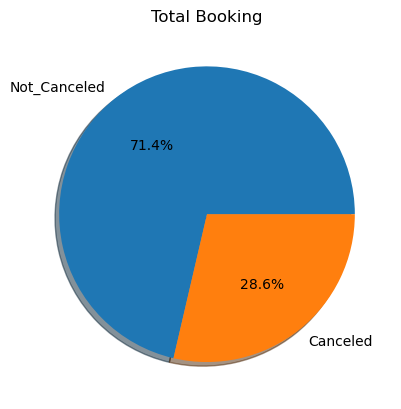

In [100]:
def func(pct):
  return "{:1.1f}%".format(pct)
 
plt.pie(booking_status_count.values,labels=booking_status_count.index, autopct=lambda pct: func(pct), shadow=True)
plt.title('Total Booking')
plt.show()

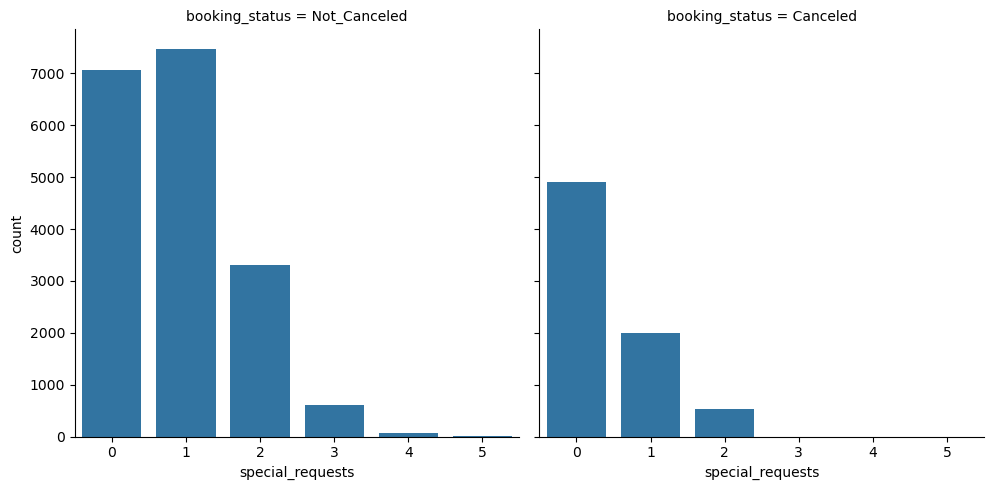

In [102]:
sb.catplot(data, x="special_requests", col='booking_status', kind='count')

Text(0, 0.5, 'Counting values')

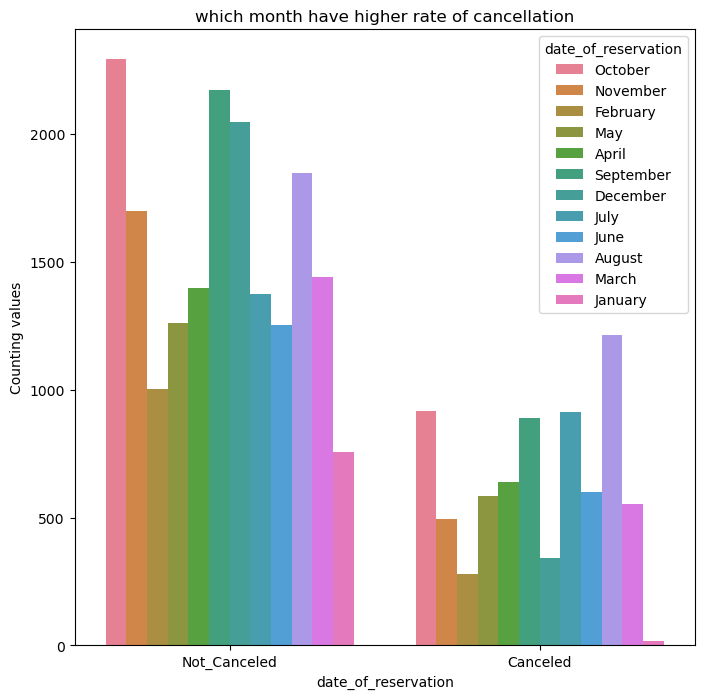

In [103]:
plt.figure(figsize = (8,8))

plt.gca().set_title('which month have higher rate of cancellation')
sb.countplot(x = 'booking_status', hue = 'date_of_reservation', data = data)
plt.xlabel('date_of_reservation')
plt.ylabel('Counting values')

In [106]:
data.columns

Index(['number_of_adults', 'number_of_children', 'number_of_weekend_nights',
       'number_of_week_nights', 'type_of_meal', 'car_parking_space',
       'room_type', 'lead_time', 'market_segment_type', 'repeated', 'P-C',
       'P-not-C', 'average_price_', 'special_requests', 'date_of_reservation',
       'booking_status', 'number_of_people'],
      dtype='object')

<Axes: xlabel='booking_status', ylabel='lead_time'>

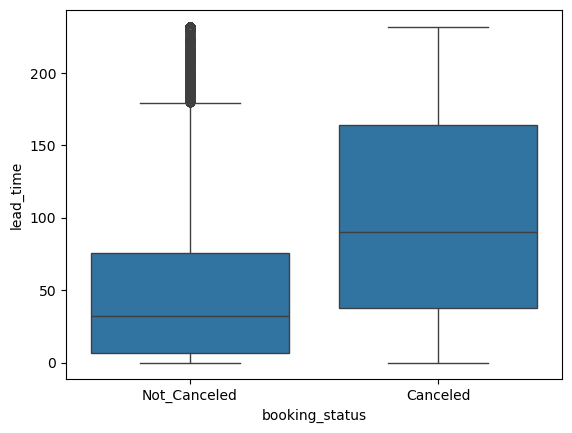

In [108]:
sb.boxplot(data, x='booking_status', y="lead_time")

**conclusions**<br>
If Special Request is More than 2, booking_status Will not be Canceled<br>
Complementary and aviation Market Segment Never Cancel<br>
Most of Cancel Booking is from High Number of Weekend Nights<br>
Meal Plan has no Effect on Cancelation<br>
IF there is parking space there is higher apportuniy for no cancellation<br>
Higher lead_time Leads to Higher Cancelation Rate<br>
Room type 5,7,3 never cancel<br>
Reservation of the months 8,7,9 are highst reservaion and 1 is the lowest <br>
Month 8 have highst rate of cancellation and 1 is the lowest<br>
Number of adults and number of children has no effect in cancellation